<a href="https://colab.research.google.com/github/syed-ateeb-naveed/ML-CEP/blob/main/ML_CEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML CEP

This is a car price prediction model made using supervised learning algorithms.

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

##Data Collection

In [251]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [252]:
#Importing data as panda's DataFrame

car = pd.read_csv("/content/drive/MyDrive/ML CEP Dataset/quikr_car.csv")
# car = pd.read_csv("/content/sample_data/quikr_car.csv")
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [253]:
car.shape

(892, 6)

In [254]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##Data Preprocessing

###Company Column

In [255]:
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

Inconsistent and invalid company names

In [256]:
#Capitalizing first letter of all company names
car["company"] = car["company"].str.lower()
car["company"] = car["company"].str.capitalize()
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'Bmw', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'Force', 'Mercedes', 'Land', 'Yamaha', 'Selling',
       'Urjent', 'Swift', 'Used', 'Jaguar', 'Jeep', 'Sale', 'Very',
       'Volvo', '2012', 'Well', 'All', '7', '9', 'Scratch', 'Urgent',
       'Sell', 'Any', 'Tara'], dtype=object)

In [257]:
#Filtering invalid company names
invalid_companies = ['Any', 'Sell', 'Sale', 'Used', 'Scratch', 'Very', 'Urjent', 'Urgent', 'Land', 'Jeep', 'Commercial', 'Selling', '2012', 'Well', 'All', '7', '9']
car = car[~car['company'].isin(invalid_companies)]


In [258]:
car["company"].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'Bmw', 'Nissan', 'Hindustan', 'Fiat',
       'Force', 'Mercedes', 'Yamaha', 'Swift', 'Jaguar', 'Volvo', 'Tara'],
      dtype=object)

###Year Column

In [259]:
car['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '150k', 'TOUR', '2003', 'r 15', '2004', '/-Rs', 'sale', '1995',
       'ara)', '2002', '2001', 'tion', 'odel', '2 bs', 'Eon', 'emi',
       'car', 'o...', 'd...', 'SALE', 'digo', 'e...', 'cent', 'cab',
       't xe', 'EV2', 'zest'], dtype=object)

Year column contains non-numeric values

In [260]:
#Removing non-numeric values
car = car[car['year'].str.isnumeric()]
car["year"].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

In [261]:
#Converting to type int
car["year"] = car["year"].astype(int)
car["year"].unique()

array([2007, 2006, 2018, 2014, 2015, 2012, 2013, 2016, 2010, 2017, 2008,
       2011, 2019, 2009, 2005, 2000, 2003, 2004, 1995, 2002, 2001])

In [262]:
car["year"]

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 840, dtype: int64

###Price Column

In [263]:
car["Price"].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

Price values are in strings and have commas in them. Third row has the value 'Ask for Price'.

In [264]:
#Removing commas
car['Price'] = car['Price'].str.replace(',', '')

In [265]:
#Getting rid from 'Ask For Price' values
car=car[car['Price']!='Ask For Price']

In [266]:
#Converting to type int
car['Price'] = car['Price'].astype(int)


In [267]:
car['Price']

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
886    300000
888    260000
889    390000
890    180000
891    160000
Name: Price, Length: 817, dtype: int64

In [268]:
car["Price"].unique()

array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

###kms_driven Column

In [269]:
car["kms_driven"].unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

Many inconsistencies. Invalid values as well as string values having 'kms' in them.

In [270]:
#Getting rid of commas and 'kms'
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [271]:
#Filtering non-numeric values
car=car[car['kms_driven'].str.isnumeric()]

In [272]:
#Converting to type int
car['kms_driven']=car['kms_driven'].astype(int)

In [273]:
car['kms_driven'].unique()

array([ 45000,     40,  28000,  36000,  41000,  25000,  24530,  60000,
        30000,  32000,  48660,   4000,  16934,  43000,  35550,  39522,
        39000,  55000,  72000,  15975,  70000,  23452,  35522,  48508,
        15487,  82000,  20000,  68000,  38000,  27000,  33000,  46000,
        16000,  47000,  35000,  30874,  15000,  29685, 130000,  19000,
        54000,  13000,  38200,  22000,  50000,  13500,   3600,  45863,
        60500,  12500,  18000,  13349,  29000,  44000,  42000,  14000,
        49000,  36200,  51000, 104000,  33333,  33600,   5600,   7500,
        26000,  24330,  65480, 200000,  59000,  99000,   2800,  21000,
        11000,  66000,   3000,   7000,  38500,  37200,  43200,  24800,
        45872,  40000,  11400,  97200,  52000,  31000, 175430,  37000,
        65000,   3350,  75000,  62000,  73000,   2200,  54870,  34580,
        97000,     60,  80200,   3200,      0,   5000,    588,  71200,
       175400,   9300,  56758,  10000,  56450,  56000,  32700,   9000,
      

In [274]:
car['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
883     50000
885     30000
886    132000
888     27000
889     40000
Name: kms_driven, Length: 815, dtype: int64

###Fuel type column

In [275]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

Fuel type column has nan values

In [276]:
car=car[~car['fuel_type'].isna()]

In [277]:
car['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [278]:
car['fuel_type']

0      Petrol
1      Diesel
3      Petrol
4      Diesel
6      Diesel
        ...  
883    Petrol
885    Diesel
886    Petrol
888    Diesel
889    Diesel
Name: fuel_type, Length: 814, dtype: object

###Name Column

In [279]:
car['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Maruti Suzuki Alto 800 Vxi', 'Hyundai i20 Sportz 1.2',
       'Maruti Suzuki Alto 800 Lx', 'Maruti Suzuki Vitara Brezza ZDi',
       'Maruti Suzuki Alto LX', 'Mahindra Bolero DI',
       'Maruti Suzuki Swift Dzire ZDi', 'Mahindra Scorpio S10 4WD',
       'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

##Cleaned Data

In [280]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


##Exploratory data analysis (EDA)

###Number Of Cars In Each Company

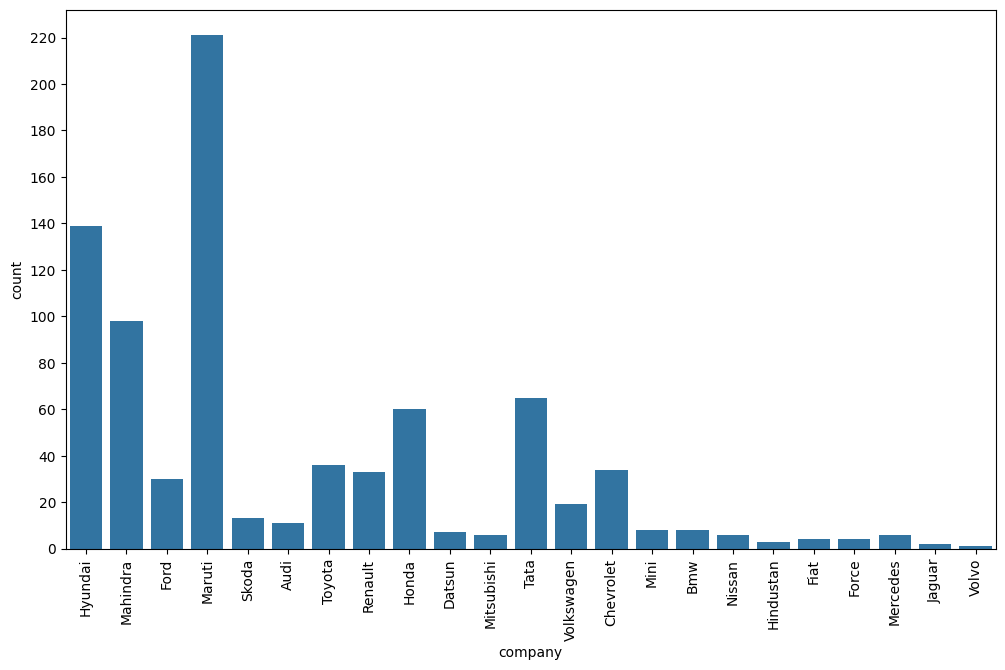

In [281]:
plt.figure(figsize=(12, 7))
sns.countplot(x='company', data=car)
plt.xticks(rotation=90)
plt.yticks(range(0, car['company'].value_counts().max() + 1, 20))
plt.show()

**Conclusions:**



*   Maruti is the most popular car company by far.
*   Hyundai and Mahindra are the second and third most popular companies.
*   There are a large number of car companies with very few cars in the dataset.





###Year vs kms_driven

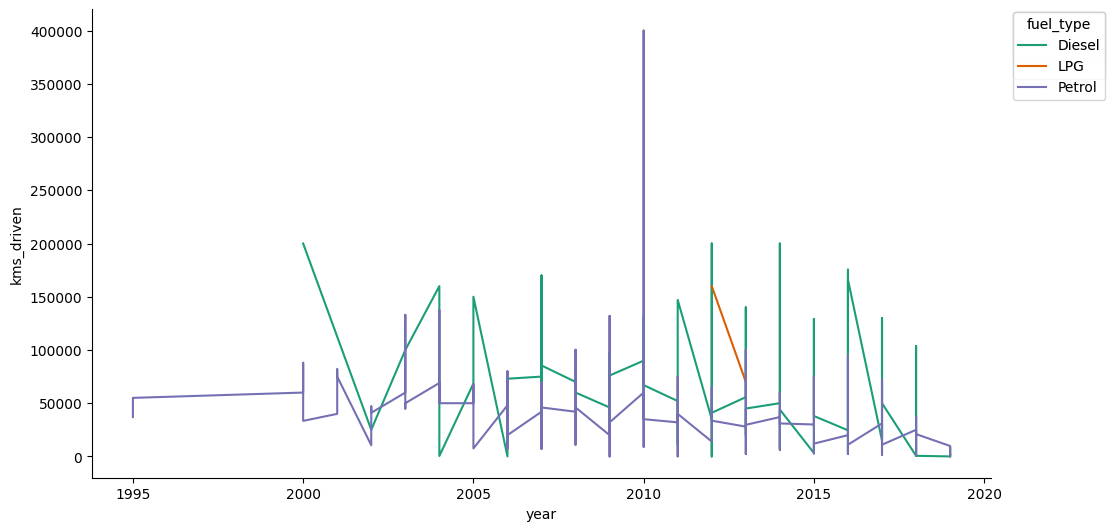

In [282]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['kms_driven']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = car.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fuel_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='fuel_type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('kms_driven')

**Conclusion:**


*   1995-2000: Petrol cars show low and consistent mileage around 50,000 kilometers, with some minor variations. Diesel cars are less frequent with variable mileage.
*   2000-2005: There is an increase in the variability of kilometers driven for both petrol and diesel cars, with petrol cars showing slightly higher mileage spikes.
*   2005-2010: Both petrol and diesel cars exhibit high variability in mileage, with peaks reaching up to 200,000 kilometers. LPG cars start appearing with moderate mileage.
*   2010-2015: The mileage for petrol and diesel cars continues to be highly variable, with some peaks exceeding 250,000 kilometers. LPG cars show limited data points with moderate mileage.
*   2015-2020: The variability in mileage for petrol and diesel cars decreases slightly, with fewer extreme peaks. LPG cars are present but less frequent, maintaining moderate mileage.

In summary, the plot shows significant variability in mileage for petrol and diesel cars over the years, with peaks during 2005-2015, while LPG cars consistently show moderate mileage.







###Fuel type vs kms_driven

<ipython-input-283-f2bd820f0c48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(car, x='kms_driven', y='fuel_type', inner='box', palette='Dark2')


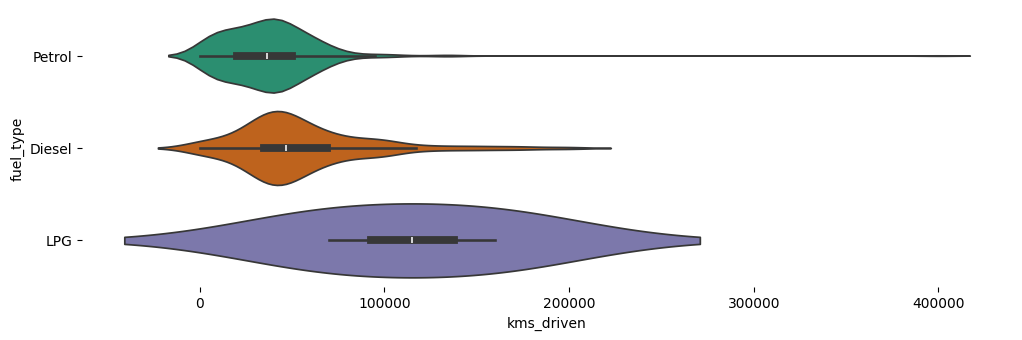

In [283]:
figsize = (12, 1.2 * len(car['fuel_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(car, x='kms_driven', y='fuel_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Conclusion:**

*   Petrol Cars: Most petrol cars have been driven between 50,000 and 100,000 kilometers, with some outliers reaching up to 400,000 kilometers.
*   Diesel Cars: Diesel cars typically have lower mileage than petrol cars, peaking around 50,000 kilometers, with some reaching up to 300,000 kilometers.
*   LPG Cars: LPG cars have a consistent mileage distribution, mostly between 50,000 and 100,000 kilometers, without extreme high-mileage outliers.











###Year Distribution

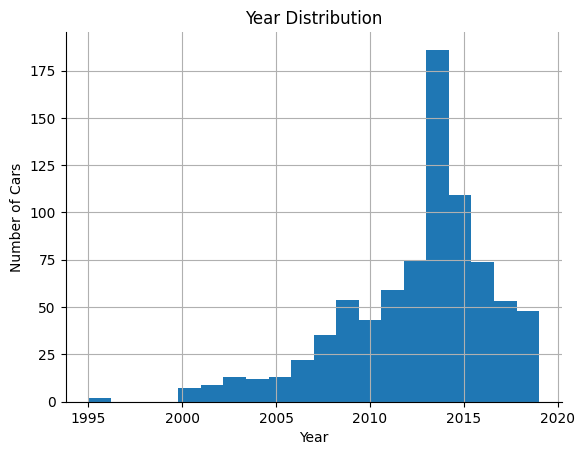

In [284]:
car['year'].plot(kind='hist', bins=20, title='Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

**Conclusion:**

1995 to 2005, indicating older models are rare. There is a gradual increase in cars from 2005 to 2010, reflecting a growing presence of mid-2000s models. The number of cars peaks sharply between 2010 and 2015, with 2014 being the most represented year, suggesting a high volume of cars from this period. After 2015, the number of cars starts to decline but still shows a significant presence of recent models up to 2020.



###Fuel Type Distribution

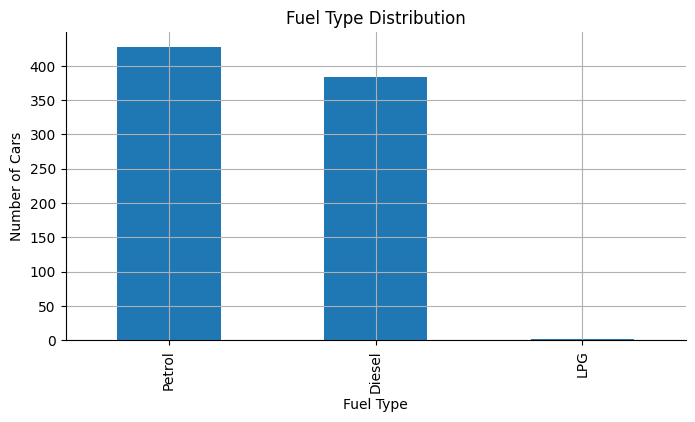

In [285]:
fuel_type_counts = car['fuel_type'].value_counts()
fuel_type_counts.plot(kind='bar', figsize=(8, 4), title='Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

**Conclusion:**

*   Number of Petrol Cars: Petrol cars are the most common in the dataset, with over 400 cars.
*   Number of Diesel Cars: Diesel cars are also well-represented, with just slightly fewer than petrol cars, totaling slightly below 400 cars.
*   Number of LPG Cars: LPG cars are rare in the dataset, with fewer than 50 cars.








###Checking Relationships with Price

####Year vs Price

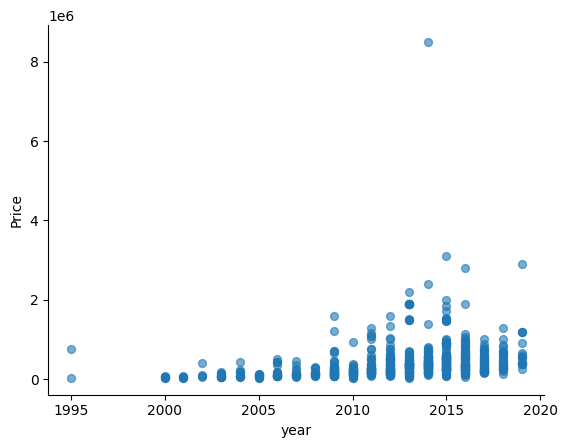

In [286]:
car.plot(kind='scatter', x='year', y='Price', s=32, alpha=.6)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Conclusion:**

*   1995-2000: Car prices are generally low, with very few high-priced outliers.
*   2000-2005: There is a slight increase in the number of cars, with prices remaining relatively low.
*   2005-2010: Car prices start to increase, with a more significant number of higher-priced cars appearing.
*   2010-2015: There is a noticeable rise in both the number of cars and their prices, with many cars priced between 1,000,000 and 2,000,000 units.
* 2015-2020: While the number of cars remains high, there is a mix of prices, with some cars priced above 2,000,000 units and a few outliers reaching up to 8,000,000 units.












####Kilometers driven vs Price

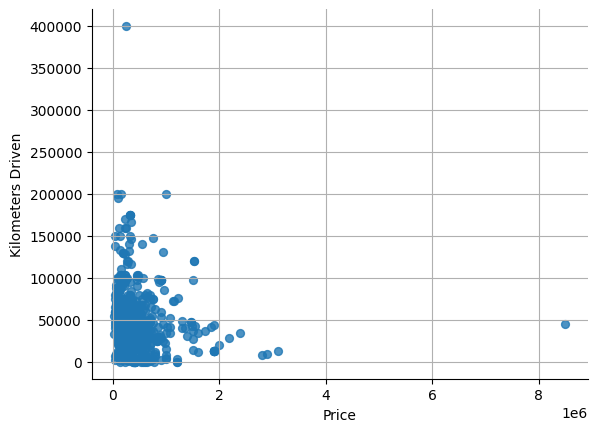

In [287]:
car.plot(kind='scatter', x='Price', y='kms_driven', s=32, alpha=0.8)
plt.xlabel('Price')
plt.ylabel('Kilometers Driven')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True)
plt.show()

**Conclusion:**


*   High Price Outlier: There is a single point around 8,000,000 units for the price and approximately 100,000 kilometers driven. This indicates a high-value car that has moderate mileage.
*   High Mileage Outlier: Another single point stands out at around 400,000 kilometers driven with a price below 2,000,000 units. This is likely a vehicle with extremely high usage, reflecting a low resale value due to the high mileage.









The high-price outlier might be a luxury vehicle that retains significant value despite its mileage.
The high-mileage outlier represents a car that has been used extensively, resulting in a lower market price.

####Fuel type vs Price

<ipython-input-288-8272dfadbd08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(car, x='Price', y='fuel_type', inner='box', palette='Dark2')


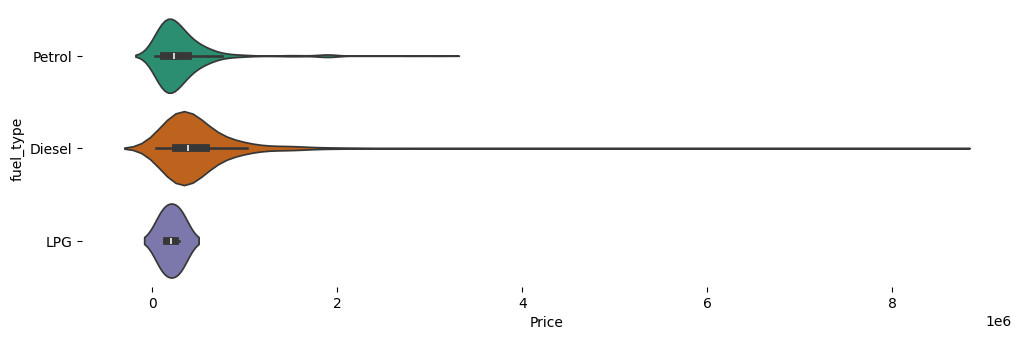

In [288]:
figsize = (12, 1.2 * len(car['fuel_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(car, x='Price', y='fuel_type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Conclusion:**


*   Petrol Cars: The prices of petrol cars are widely distributed, with most prices concentrated below 2,000,000 units.
*   Diesel Cars: Diesel cars also show a wide price distribution, but the majority of prices are below 1,500,000 units.
*   LPG Cars: LPG cars have a much narrower price range, with most prices concentrated below 500,000 units.





####Company vs Price

In [289]:
car['company'].nunique()

23

<ipython-input-290-97b9b5bfec60>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


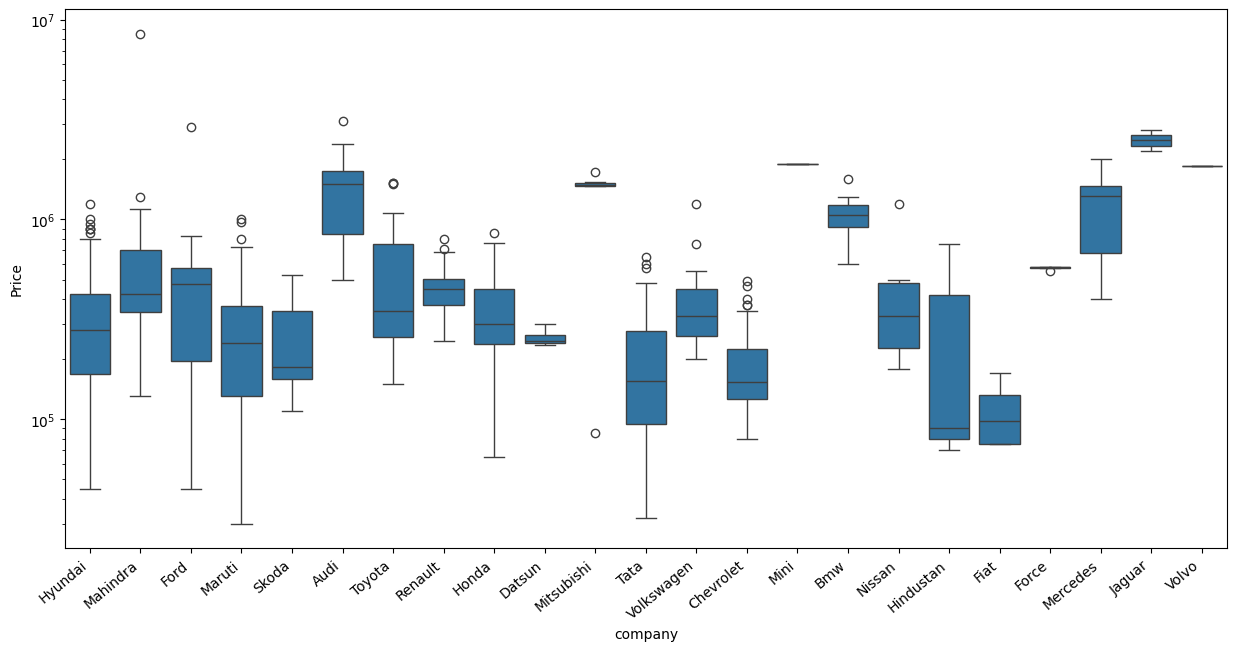

In [290]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.yscale('log')
plt.show()

**Conclusion:**



*   Price Distribution: Some companies have a wider price range, indicating a diverse product lineup, while others have a narrower range, suggesting a focus on specific price segments.
*   Luxury Brands: Brands like BMW, Audi, and Mercedes-Benz generally command higher prices compared to other brands.


*   Budget-Friendly Brands: Brands like Maruti, Hyundai, and Mahindra tend to have lower price ranges.
*   Outliers: Some outliers are present potentially due to limited editions, special features, or high demand.





##Feature Engineering

In [291]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [292]:
#X = car.drop(columns='Price')
X = car

In [293]:
X.shape

(814, 6)

In [294]:
y = car['Price']
y

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 814, dtype: int64

In [295]:
y.shape

(814,)

In [296]:
X

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [297]:
X = X.drop(columns='Price')

**Encoding using OneHotEncoder**

In [298]:
ohe=OneHotEncoder()
ohe.fit(X[['name', 'company','fuel_type']])

OneHotEncoder()

In [299]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name', 'company','fuel_type']),
                                    remainder='passthrough')

In [300]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X[['year', 'kms_driven']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name', 'company','fuel_type']),
                                    (sc, ['year', 'kms_driven']),
                                    remainder='passthrough')



##Models' Preparation & Testing

###Linear Regression

####With Package

In [301]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42)

In [302]:
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'Bmw', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Mahindra', 'Maruti',
       'Mercedes', 'Mini', 'Mitsubishi', 'Nissan', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['year', 'kms_driven'])])),
                ('linearregression', LinearRegression())])

In [303]:
y_pred=pipe.predict(X_test)

In [304]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 57535643153.66138
Root Mean Squared Error (RMSE): 239865.8857646526
Mean Absolute Error (MAE): 119129.87383142418
R-squared (R2): 0.6714142958060739


**Randomizing Train Test Split To Attain Best R^2 Score**

In [305]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [306]:
max_score_state = np.argmax(scores)
max_score_state

68

In [307]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=max_score_state)
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)

In [308]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 12847192271.432579
Root Mean Squared Error (RMSE): 113345.45545116742
Mean Absolute Error (MAE): 68639.51253089562
R-squared (R2): 0.9165043537674948


####Without Package

**Defining Evaluation Metrics to be used for all models without package**

In [309]:
def mean_square_error(y_true, y_pred):
    # Calculate mean squared error
    mse = np.mean((y_true - y_pred)**2)
    return mse

def root_mean_square_error(y_true, y_pred):
  # Calculate root mean squared error
  mse = sum((y_true - y_pred)**2) / len(y_true)
  return mse**0.5

def mean_abs_error(y_true, y_pred):
  # Calculate mean absolute error
  return sum(abs(y_true - y_pred)) / len(y_true)

def calculate_r2(y_true, y_pred):
  # Calculate R^2 score
  ss_total = sum((y_true - y_true.mean())**2)
  ss_residual = sum((y_true - y_pred)**2)
  return 1 - (ss_residual / ss_total)

In [310]:
def linear_regression(X, y):
    # Add intercept term to X
    #print("Add intercept term to X")
    X = np.column_stack((np.ones(len(X)), X))
    #print(X)

    # Calculate theta using the normal equation
    #print("Calculate theta using the normal equation")
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    #print(theta)

    return theta

def predict(X, theta):
    # Add intercept term to X
    #print("Add intercept term to X while predicting")
    X = np.column_stack((np.ones(len(X)), X))
    #print(X)

    # Predict y values
    #print("Predict y values")
    y_pred = X.dot(theta)
    #print(y_pred)

    return y_pred

In [311]:
label_encoder = LabelEncoder()

In [312]:
X = car.drop(columns='Price')
y = car["Price"]

In [313]:
X_label_encoded = X
#Encoded fuel_type
X_label_encoded["fuel_type"] = label_encoder.fit_transform(X["fuel_type"])

#Encoding company
X_label_encoded["company"] = car["company"]
companies_to_encode = ['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Toyota', 'Renault', 'Honda', 'Tata', 'Chevrolet']
X_label_encoded['company'] = X['company'].apply(lambda x: 'other' if x not in companies_to_encode else x)

X_label_encoded['company'] = label_encoder.fit_transform(X['company'])

#Encoding name
X_label_encoded['name'] = label_encoder.fit_transform(X['name'])

X_label_encoded['kms_driven'] = X['kms_driven']
X_label_encoded['year'] = X['year']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X_label_encoded, y, test_size=0.2, random_state=42)

In [315]:
theta = linear_regression(X_train, y_train)

In [316]:
y_pred = predict(X_test, theta)

In [317]:
mse = mean_square_error(y_test, y_pred)
mse

111029358204.30176

In [318]:
rmse = root_mean_square_error(y_test, y_pred)
rmse

333210.681407877

In [319]:
mae = mean_abs_error(y_test, y_pred)
mae

199788.2272634931

In [320]:
r2 = calculate_r2(y_test, y_pred)
r2

0.36591201814977015

**Randomizing Train Test Split To Attain Best R^2 Score**

In [321]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    theta = linear_regression(X_train, y_train)
    y_pred = predict(X_test, theta)
    scores.append(r2_score(y_test,y_pred))

In [322]:
max_score_state = np.argmax(scores)
max_score_state

519

In [323]:
X_train,X_test,y_train,y_test=train_test_split(X_label_encoded,y,test_size=0.1,random_state=max_score_state)
theta = linear_regression(X_train, y_train)
y_pred = predict(X_test, theta)

In [324]:
mse = mean_square_error(y_test, y_pred)
rmse = root_mean_square_error(y_test, y_pred)
mae = mean_abs_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 51266565923.9635
Root Mean Squared Error (RMSE): 226421.2135025415
Mean Absolute Error (MAE): 155407.70895336327
R-squared (R2): 0.5788737948658695


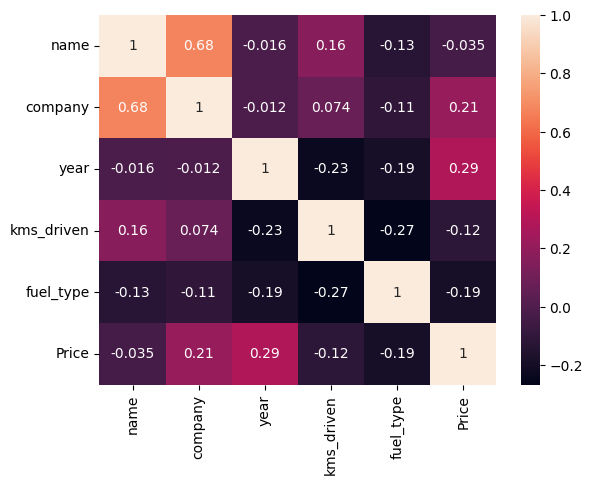

In [325]:
sns.heatmap(pd.concat([X, y], axis=1).corr(), annot=True)
plt.show()

### Random Forest

####With Package

In [344]:
# Create a random forest regressor
forest = RandomForestRegressor()

X_train,X_test,y_train,y_test=train_test_split(X_label_encoded,y,test_size=0.1,random_state=519)
# Train the model
forest.fit(X_train, y_train)

# Predict on test data
y_pred = forest.predict(X_test)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='r2', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R-squared score: {best_score}")

# Predict on test data with the best model
best_forest = grid_search.best_estimator_
y_pred = best_forest.predict(X_test)


# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}
Best R-squared score: 0.47175137994072436
Mean Squared Error (MSE): 20851347065.736904
Root Mean Squared Error (RMSE): 144399.9552137635
Mean Absolute Error (MAE): 98677.73235899332
R-squared (R2): 0.8287178299644223


####Without Package

In [346]:
class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split, min_samples_leaf=self.min_samples_leaf)
            X_sample, y_sample = bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        predictions = []
        for tree in self.trees:
            predictions.append(tree.predict(X))
        return np.mean(predictions, axis=0)

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    indices = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[indices], y[indices]

class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='mse'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) <= self.min_samples_split or (self.max_depth is not None and depth == self.max_depth) or len(np.unique(y)) == 1:
            return {'value': np.mean(y)}

        best_split = self._find_best_split(X, y)

        if best_split is None:
            return {'value': np.mean(y)}

        left_indices, right_indices, split_feature, split_threshold = best_split

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': split_feature, 'threshold': split_threshold,
                'left': left_tree, 'right': right_tree}

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_split = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                mse = self._calculate_mse(y[left_indices], y[right_indices])

                if mse < best_mse:
                    best_mse = mse
                    best_split = (left_indices, right_indices, feature, threshold)

        return best_split

    def _calculate_mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y)) ** 2)
        right_mse = np.mean((right_y - np.mean(right_y)) ** 2)
        return left_mse * len(left_y) + right_mse * len(right_y)

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if 'value' in tree:
            return tree['value']

        if sample[tree['feature']] < tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

# Assuming 'car' is a pandas DataFrame
X = car.drop(columns='Price').values
y = car['Price'].values

# Train-test split
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the model with advanced decision tree
forest = RandomForest(n_estimators=10, max_depth=10, min_samples_split=5, min_samples_leaf=5)
forest.fit(X_train, y_train)

# Predict
y_pred = forest.predict(X_test)

# Calculate metrics
mse = mean_square_error(y_test, y_pred)
rmse = root_mean_square_error(y_test, y_pred)
mae = mean_abs_error(y_test, y_pred)
r2 = calculate_r2(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 91950998703.77516
Root Mean Squared Error (RMSE): 303234.23075862526
Mean Absolute Error (MAE): 144513.5656410533
R-squared (R2): 0.4343183194967273


###Decision Tree Regression

####With Package

In [328]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


# Initialize Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, scoring='r2', cv=5)

X_train, X_test, y_train, y_test = train_test_split(X_label_encoded, y, test_size=0.2, random_state=42)
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best R-squared score: {best_score}")

# Predict on test data with the best model
best_dt_regressor = grid_search.best_estimator_
y_pred = best_dt_regressor.predict(X_test)

# Calculate accuracy score (R-squared score)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R-squared score: 0.2881749431554635
Mean Squared Error (MSE): 107352688161.58234
Root Mean Squared Error (RMSE): 327647.20075346646
Mean Absolute Error (MAE): 166239.90262196903
R-squared (R2): 0.3869094581514254


####Without Package

In [329]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='mse'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        if len(y) <= self.min_samples_split or (self.max_depth is not None and depth == self.max_depth) or len(np.unique(y)) == 1:
            return {'value': np.mean(y)}

        best_split = self._find_best_split(X, y)

        if best_split is None:
            return {'value': np.mean(y)}

        left_indices, right_indices, split_feature, split_threshold = best_split

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {'feature': split_feature, 'threshold': split_threshold,
                'left': left_tree, 'right': right_tree}

    def _find_best_split(self, X, y):
        best_mse = float('inf')
        best_split = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices

                if len(y[left_indices]) < self.min_samples_leaf or len(y[right_indices]) < self.min_samples_leaf:
                    continue

                mse = self._calculate_mse(y[left_indices], y[right_indices])

                if mse < best_mse:
                    best_mse = mse
                    best_split = (left_indices, right_indices, feature, threshold)

        return best_split

    def _calculate_mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y)) ** 2)
        right_mse = np.mean((right_y - np.mean(right_y)) ** 2)
        return left_mse * len(left_y) + right_mse * len(right_y)

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, tree):
        if 'value' in tree:
            return tree['value']

        if sample[tree['feature']] < tree['threshold']:
            return self._predict_sample(sample, tree['left'])
        else:
            return self._predict_sample(sample, tree['right'])

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r_squared(y_true, y_pred):
    total_variance = np.var(y_true) * len(y_true)
    explained_variance = total_variance - mean_squared_error(y_true, y_pred) * len(y_true)
    return explained_variance / total_variance

# Assuming 'car' is a pandas DataFrame
X = car.drop(columns='Price').values
y = car['Price'].values

# Train-test split
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the model with advanced decision tree
tree = DecisionTree(max_depth=10, min_samples_split=5, min_samples_leaf=5)
tree.fit(X_train, y_train)

# Predict
y_pred = tree.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r_squared(y_test, y_pred)

# Print the metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 111144494509.60516
Root Mean Squared Error (RMSE): 333383.4046703662
Mean Absolute Error (MAE): 179956.0043744319
R-squared (R2): 0.316240113547578


##Comparisions and Conclusions

The Linear Regression model has the highest R-squared value (0.9165), indicating that it explains about 91.65% of the variance in the car prices. This suggests that Linear Regression is the best model in terms of accuracy. It also  has the lowest MSE, RMSE, and MAE values, indicating that it has the smallest prediction errors among the three models.



*   Linear Regression is a simpler model compared to Decision Trees and Random Forest, yet it outperforms both in terms of accuracy and error metrics. This could be due to the nature of the dataset and the relationship between features and the car prices.
*   Decision Tree Regression and Random Forest are more complex models that can capture non-linear relationships. However, in this case, they seem to overfit or underfit the data, leading to worse performance compared to Linear Regression.

